# Données Titanic

In [129]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.decomposition import PCA
from os import chdir

In [130]:
# chdir('../donnees/Titanic/')

## Répartition train/test

In [131]:
df_test = pd.read_csv('./test.csv')
df_train = pd.read_csv('./train.csv')

In [132]:
df_train['SPLIT'] = 'Train'
df_test['SPLIT'] = 'Test'
df = pd.concat([df_train, df_test], axis=0)

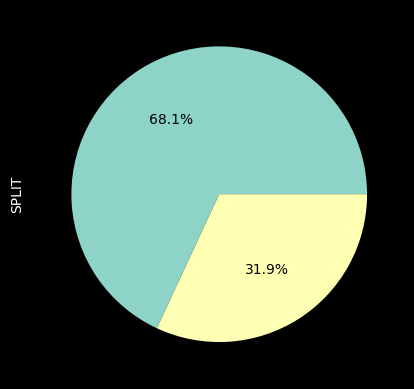

In [133]:
ax = df.SPLIT.value_counts().plot(kind='pie', autopct='%1.1f%%', )
for t in ax.texts:
    t.set_color('black')
plt.show()

## Valeurs manquantes

Dans les données d’entraînement :

In [134]:
round(df_train.isna().sum() / len(df_train) * 100, 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
SPLIT           0.0
dtype: float64

In [135]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [136]:
df_train.loc[df_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SPLIT
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Train
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Train


<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

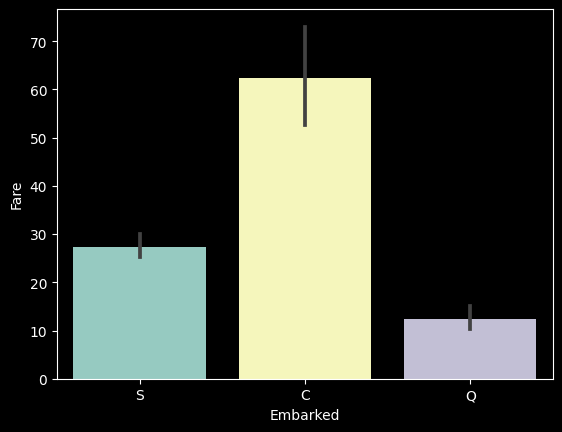

In [137]:
sns.barplot(df, y='Fare', x='Embarked')

Comme ces deux passagers du ticket numéro 113572 ont payé 80£, on peut raisonnablement estimer qu'ils sont partis de Cherbourg.

In [138]:
df.loc[df.PassengerId.isin(df_train.loc[df_train.Embarked.isna(), 'PassengerId'].values), 'Embarked'] = 'C'

Dans les données de test :

In [139]:
round(df_test.isna().sum() / len(df_test) * 100, 1)

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.6
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.2
Cabin          78.2
Embarked        0.0
SPLIT           0.0
dtype: float64

In [140]:
# Enlever la seule valeur nulle de Fare

df = df[df.PassengerId != df_test.loc[df_test.Fare.isna(), 'PassengerId'].values[0]]

> Il manque donc au total, 20% des valeurs d'`Age` et 78% des valeurs de `Cabin`.

L'attribution des cabines n'étant que très peu connu, il vaudrait mieux abandonner cette colonne.

In [141]:
df = df.drop(columns=['Cabin'])

In [142]:
round(df.isna().sum() / len(df) * 100, 1)

PassengerId     0.0
Survived       31.9
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.1
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
SPLIT           0.0
dtype: float64

<AxesSubplot: xlabel='Age'>

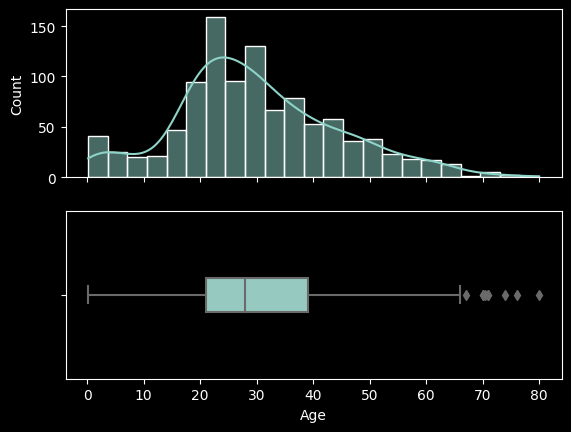

In [143]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df.Age, kde=True, ax=ax[0])
sns.boxplot(df, x='Age', width=0.2, ax=ax[1])

In [144]:
from numpy.random import uniform

df.Age = df.Age.apply(lambda x: \
                        uniform(
                            df.Age.quantile(0.25), 
                            df.Age.quantile(0.75)
                            )
                        if pd.isna(x) else x
                    )

<AxesSubplot: xlabel='Age'>

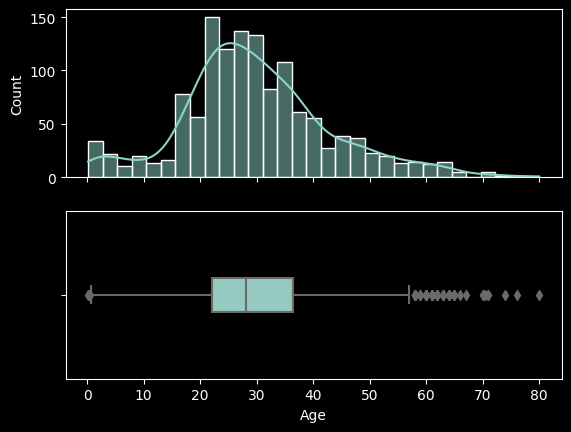

In [145]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df.Age, kde=True, ax=ax[0])
sns.boxplot(df, x='Age', width=0.2, ax=ax[1])

In [146]:
round(df.isna().sum() / len(df) * 100, 1)

PassengerId     0.0
Survived       31.9
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
SPLIT           0.0
dtype: float64